In [1]:
!pip install pennylane

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.1/57.1 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 48.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 930.8/930.8 kB 39.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 65.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 60.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.9/167.9 kB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 81.6 MB/s eta 0:00:00


In [2]:
#from ydata_profiling import ProfileReport
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import zipfile
import seaborn as sns
import matplotlib.pyplot as plt

import pennylane as qml
from pennylane.templates import AngleEmbedding
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler , MaxAbsScaler , MinMaxScaler, RobustScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split ,GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, precision_score, recall_score , classification_report
from sklearn.metrics import confusion_matrix , RocCurveDisplay, ConfusionMatrixDisplay
from sklearn.utils import class_weight
import warnings

warnings.filterwarnings('ignore')

In [3]:
with zipfile.ZipFile("parkinson+s+disease+classification.zip", "r") as zip_ref:
    zip_ref.extractall("parkinsons_data")

In [4]:
os.listdir("parkinsons_data")

['pd_speech_features.rar']

In [5]:
!apt-get install unrar
!unrar x parkinsons_data/pd_speech_features.rar parkinsons_data/

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
unrar is already the newest version (1:6.1.5-1ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.

UNRAR 6.11 beta 1 freeware      Copyright (c) 1993-2022 Alexander Roshal


Extracting from parkinsons_data/pd_speech_features.rar

Extracting  parkinsons_data/pd_speech_features.csv                         1%  3%  4%  6%  7%  9% 10% 12% 13% 15% 16% 18% 19% 21% 22% 24% 26% 27% 29% 30% 32% 33% 35% 36% 38% 39% 41% 42% 44% 45% 47% 48% 50% 52% 53% 55% 56% 58% 59% 61% 62% 64% 65% 67% 68% 70% 71% 73% 74% 76% 78% 79% 81% 82% 84% 85% 87% 88% 90% 91% 93% 94% 96% 97% 99%100%  OK 
All OK


In [6]:
os.listdir("parkinsons_data")

['pd_speech_features.rar', 'pd_speech_features.csv']

In [7]:
data = pd.read_csv("parkinsons_data/pd_speech_features.csv",header=[0,1])

In [8]:
data

,Unnamed: 0_level_0,Unnamed: 1_level_0,Baseline Features,Unnamed: 3_level_0,Unnamed: 4_level_0,Unnamed: 5_level_0,Unnamed: 6_level_0,Unnamed: 7_level_0,Unnamed: 8_level_0,Unnamed: 9_level_0,...,Unnamed: 745_level_0,Unnamed: 746_level_0,Unnamed: 747_level_0,Unnamed: 748_level_0,Unnamed: 749_level_0,Unnamed: 750_level_0,Unnamed: 751_level_0,Unnamed: 752_level_0,Unnamed: 753_level_0,Unnamed: 754_level_0
,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,250,0,0.80903,0.56355,0.28385,417,416,0.004627,0.000052,0.00064,...,3.0706,3.0190,3.1212,2.4921,3.5844,3.5400,3.3805,3.2003,6.8671,0
752,250,0,0.16084,0.56499,0.59194,415,413,0.004550,0.000220,0.00143,...,1.9704,1.7451,1.8277,2.4976,5.2981,4.2616,6.3042,10.9058,28.4170,0
753,251,0,0.88389,0.72335,0.46815,381,380,0.005069,0.000103,0.00076,...,51.5607,44.4641,26.1586,6.3076,2.8601,2.5361,3.5377,3.3545,5.0424,0


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Columns: 755 entries, ('Unnamed: 0_level_0', 'id') to ('Unnamed: 754_level_0', 'class')
dtypes: float64(749), int64(6)
memory usage: 4.4 MB


In [10]:
data.columns = [
    "_".join([str(c) for c in col if "Unnamed" not in str(c)]).strip()
    for col in data.columns
]
print("columns:", data.columns[:])

columns: Index(['id', 'gender', 'Baseline Features_PPE', 'DFA', 'RPDE', 'numPulses',
       'numPeriodsPulses', 'meanPeriodPulses', 'stdDevPeriodPulses',
       'locPctJitter',
       ...
       'tqwt_kurtosisValue_dec_28', 'tqwt_kurtosisValue_dec_29',
       'tqwt_kurtosisValue_dec_30', 'tqwt_kurtosisValue_dec_31',
       'tqwt_kurtosisValue_dec_32', 'tqwt_kurtosisValue_dec_33',
       'tqwt_kurtosisValue_dec_34', 'tqwt_kurtosisValue_dec_35',
       'tqwt_kurtosisValue_dec_36', 'class'],
      dtype='object', length=755)


In [11]:
data

,id,gender,Baseline Features_PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,250,0,0.80903,0.56355,0.28385,417,416,0.004627,0.000052,0.00064,...,3.0706,3.0190,3.1212,2.4921,3.5844,3.5400,3.3805,3.2003,6.8671,0
752,250,0,0.16084,0.56499,0.59194,415,413,0.004550,0.000220,0.00143,...,1.9704,1.7451,1.8277,2.4976,5.2981,4.2616,6.3042,10.9058,28.4170,0
753,251,0,0.88389,0.72335,0.46815,381,380,0.005069,0.000103,0.00076,...,51.5607,44.4641,26.1586,6.3076,2.8601,2.5361,3.5377,3.3545,5.0424,0
754,251,0,0.83782,0.74890,0.49823,340,339,0.005679,0.000055,0.00092,...,19.1607,12.8312,8.9434,2.2044,1.9496,1.9664,2.6801,2.8332,3.7131,0


In [12]:
X = data.drop(columns=['class'])
y = data['class']

In [13]:
X = X.apply(pd.to_numeric, errors='coerce')

In [14]:
# =============================================================================
# STEP 1: Data Preprocessing with PCA for Dimensionality Reduction
# =============================================================================

def preprocess_data_with_pca(X_train, X_test, n_qubits, encoding):
    """
    Preprocesses the data using MinMaxScaler and then reduces dimensionality with PCA.
    Adjusts n_components for PCA based on the encoding type.

    Args:
        X_train (np.ndarray): Training feature data.
        X_test (np.ndarray): Testing feature data.
        n_qubits (int): The target number of qubits.
        encoding (str): The quantum encoding strategy to use.

    Returns:
        tuple: A tuple containing:
            - X_train_pca (np.ndarray): Transformed training data.
            - X_test_pca (np.ndarray): Transformed testing data.
            - scaler (MinMaxScaler): The fitted scaler object.
            - pca (PCA): The fitted PCA object.
    """
    print(f"Original feature count: {X_train.shape[1]}")

    # Determine the number of components for PCA based on the encoding and n_qubits
    if encoding == "amplitude":
        # AmplitudeEncoding requires 2^n_qubits features
        pca_components = 2**n_qubits
        print(f"Target feature count (for amplitude encoding): {pca_components}")
    else:
        # Other encodings use n_qubits features
        pca_components = n_qubits
        print(f"Target feature count (n_qubits): {pca_components}")


    # 1. Scale features using MinMaxScaler
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # 2. Apply PCA to reduce dimensions
    # Ensure pca_components does not exceed the number of features after scaling
    pca_components = min(pca_components, X_train_scaled.shape[1])

    pca = PCA(n_components=pca_components)
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)

    print(f"Data transformed to {X_train_pca.shape[1]} principal components.")

    return X_train_pca, X_test_pca, scaler, pca


In [15]:
# =============================================================================
# STEP 2: Quantum Circuit and Kernel Functions
# =============================================================================

def create_quantum_device(n_qubits):
    """
    Initializes a PennyLane quantum device.
    lightning.qubit is a fast state-vector simulator.
    """
    return qml.device("lightning.qubit", wires=n_qubits)

def quantum_kernel_circuit(n_qubits, encoding="angle", reps=2):
    """
    Flexible quantum kernel circuit with multiple encoding strategies.
    encoding ∈ {"angle", "amplitude", "zzfeaturemap"}
    """
    projector = np.zeros((2 ** n_qubits, 2 ** n_qubits))
    projector[0, 0] = 1
    dev = create_quantum_device(n_qubits)

    @qml.qnode(dev)
    def kernel(x1, x2):
        if encoding == "angle":
            qml.AngleEmbedding(x1, wires=range(n_qubits))
            qml.adjoint(qml.AngleEmbedding)(x2, wires=range(n_qubits))

        elif encoding == "amplitude":
            # AmplitudeEmbedding requires the number of features to be 2**n_qubits
            if len(x1) != 2**n_qubits or len(x2) != 2**n_qubits:
                 raise ValueError(f"AmplitudeEmbedding requires input vector length to be 2**n_qubits ({2**n_qubits}), but got {len(x1)}")
            qml.AmplitudeEmbedding(features=x1, wires=range(n_qubits), normalize=True)
            qml.adjoint(qml.AmplitudeEmbedding)(features=x2, wires=range(n_qubits), normalize=True)

        elif encoding == "zzfeaturemap":
            def zz_map(x, wires, reps=1):
              n = len(wires)
              pairs = np.triu_indices(n, k=1)  # upper-triangle pairs (i<j)

              for _ in range(reps):
                  # Apply Hadamards to all wires
                  qml.Hadamard(wires=wires)

                  # Apply RZ rotations with vectorized input
                  qml.RZ(x, wires=wires)

                  # Apply entangling CRX gates for each pair
                  angles = (np.pi - x[pairs[0]]) * (np.pi - x[pairs[1]])
                  for (i, j), angle in zip(zip(*pairs), angles):
                      qml.CRX(angle, wires=[wires[i], wires[j]])

        else:
            raise ValueError("Unknown encoding type.")

        return qml.expval(qml.Hermitian(projector, wires=range(n_qubits)))

    return kernel

def kernel_matrix(A, B, n_qubits, encoding="angle"):
    """
    Compute kernel matrix between datasets A and B.
    """
    kernel = quantum_kernel_circuit(n_qubits, encoding)
    return np.array([[kernel(a, b) for b in B] for a in A])


In [16]:
# =============================================================================
# STEP 3: Model Training and Prediction
# =============================================================================

def train_quantum_svm(X_train_pca, y_train, n_qubits, encoding="angle"):
    """
    Trains a quantum SVM with a precomputed quantum kernel, using class weights.
    """

    # Compute the quantum kernel matrix for the training data with the specified encoding
    print(f"Computing kernel matrix for training data with {encoding} encoding...")
    kernel_matrix_train = kernel_matrix(X_train_pca, X_train_pca, n_qubits, encoding=encoding)

    # --- Calculate class weights to handle imbalance ---
    weights = class_weight.compute_class_weight(
        class_weight='balanced',
        classes=np.unique(y_train),
        y=y_train
    )
    class_weight_dict = dict(zip(np.unique(y_train), weights))
    print(f"Using class weights: {class_weight_dict}")

    # --- Hyperparameter tuning for SVM's C parameter ---
    param_grid = {'C': [0.1, 1, 10, 100]}
    svm = SVC(kernel='precomputed', probability=True, random_state=42, class_weight=class_weight_dict)

    print("Running GridSearchCV to find the best C parameter...")
    grid_search = GridSearchCV(svm, param_grid, cv=3, verbose=2)
    grid_search.fit(kernel_matrix_train, y_train)

    best_svm = grid_search.best_estimator_
    print(f"Best parameters found: {grid_search.best_params_}")

    return best_svm


def predict_quantum_svm(svm, X_test_pca, X_train_pca, n_qubits, encoding="angle"):
    """
    Makes predictions using the trained quantum SVM.
    """
    # Compute the kernel between the test data and the original training data with the specified encoding
    print(f"Computing kernel matrix for test data with {encoding} encoding...")
    kernel_matrix_test = kernel_matrix(X_test_pca, X_train_pca, n_qubits, encoding=encoding)

    # Make predictions and get probabilities
    predictions = svm.predict(kernel_matrix_test)
    probabilities = svm.predict_proba(kernel_matrix_test)[:, 1] # Probability of the positive class

    return predictions, probabilities

In [17]:
# =============================================================================
# STEP 4: Evaluation Functions
# =============================================================================

def evaluate_model_performance(y_true, y_pred, y_proba):
    """
    Evaluates model performance and returns a dictionary of metrics.
    """
    metrics = {
        'accuracy': accuracy_score(y_true, y_pred),
        'roc_auc': roc_auc_score(y_true, y_proba),
        'f1': f1_score(y_true, y_pred),
        'precision': precision_score(y_true, y_pred),
        'recall': recall_score(y_true, y_pred),
        'confusion_matrix': confusion_matrix(y_true, y_pred)
    }

    # Calculate specificity from the confusion matrix
    # Ensure there are predictions for both classes to avoid division by zero
    conf_matrix = confusion_matrix(y_true, y_pred)
    if conf_matrix.shape == (2, 2):
        tn, fp, fn, tp = conf_matrix.ravel()
        specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    else: # Handle case where model only predicts one class
        specificity = 0
    metrics['specificity'] = specificity

    return metrics

def print_results(metrics):
    """Prints the performance metrics in a formatted way."""
    print("\nQuantum SVM Performance Metrics:")
    print("=" * 40)
    print(f"Accuracy:     {metrics['accuracy']:.3f}")
    print(f"ROC/AUC:      {metrics['roc_auc']:.3f}")
    print(f"F1 Score:     {metrics['f1']:.3f}")
    print(f"Precision:    {metrics['precision']:.3f}")
    print(f"Recall:       {metrics['recall']:.3f}")
    print(f"Specificity:  {metrics['specificity']:.3f}")
    print("\nConfusion Matrix:")
    print(metrics['confusion_matrix'])
    print("=" * 40)

In [18]:
# =============================================================================
# STEP 5: Main Pipeline Function
# =============================================================================

def run_quantum_svm_pipeline(X_train, y_train, X_test, y_test, encoding="angle"):
    """
    Executes the complete pipeline for QSVM training, prediction, and evaluation
    for a given encoding type.

    Args:
        X_train, y_train, X_test, y_test: The dataset split into training and testing sets.
        encoding (str): The quantum encoding strategy to use.
    """
    # Determine n_qubits based on encoding
    if encoding == "amplitude":
        # For amplitude encoding, n_qubits is log2 of the number of features after PCA
        n_qubits = 4 # Default for amplitude
        print(f"\n--- Starting Quantum SVM Pipeline for {encoding} encoding ---")
    else:
        # For other encodings, n_qubits is the number of features after PCA.
        n_qubits = 8
        print(f"\n--- Starting Quantum SVM Pipeline for {n_qubits} Qubits ({encoding} encoding) ---")


    # 1. Preprocess features with PCA - adjust n_components based on encoding
    print("\n1. Preprocessing and reducing feature dimensions with PCA...")
    X_train_pca, X_test_pca, scaler, pca = preprocess_data_with_pca(
        X_train, X_test, n_qubits, encoding
    )

    # If using amplitude encoding, the actual number of qubits is determined by the number of PCA components
    if encoding == "amplitude":
        n_qubits = int(np.log2(X_train_pca.shape[1]))
        print(f"Actual n_qubits for amplitude encoding: {n_qubits}")


    # 2. Train the Quantum SVM (imbalance is handled by class_weight inside)
    print("\n2. Training Quantum SVM...")
    svm_model = train_quantum_svm(X_train_pca, y_train, n_qubits, encoding=encoding)

    # 3. Make predictions
    print("\n3. Making predictions on the test set...")
    y_pred, y_proba = predict_quantum_svm(
        svm_model, X_test_pca, X_train_pca, n_qubits, encoding=encoding
    )

    # 4. Evaluate performance
    print("\n4. Evaluating model performance...")
    metrics = evaluate_model_performance(y_test, y_pred, y_proba)
    print_results(metrics)

    print(f"\n--- Pipeline for {n_qubits} Qubits ({encoding} encoding) Finished ---")

    return {
        'model': svm_model,
        'scaler': scaler,
        'pca': pca,
        'metrics': metrics,
        'encoding': encoding
    }


--- Data Subsetting for Speed ---
Original training set size: 567 samples
Original class distribution: Class 0: 144, Class 1: 423

Taking a subset of 300 samples for faster execution...

--- Starting Quantum SVM Pipeline for amplitude encoding ---

1. Preprocessing and reducing feature dimensions with PCA...
Original feature count: 754
Target feature count (for amplitude encoding): 16
Data transformed to 16 principal components.


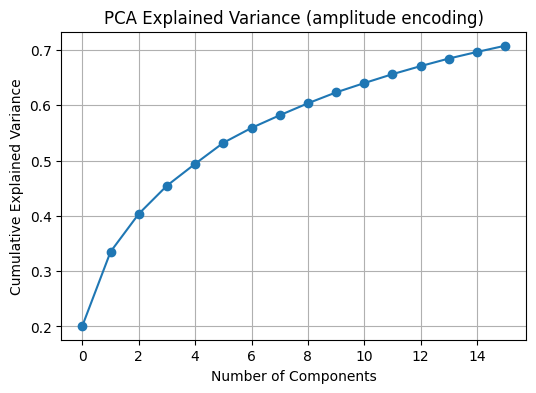

Actual n_qubits for amplitude encoding: 4

2. Training Quantum SVM...
Computing kernel matrix for training data with amplitude encoding...


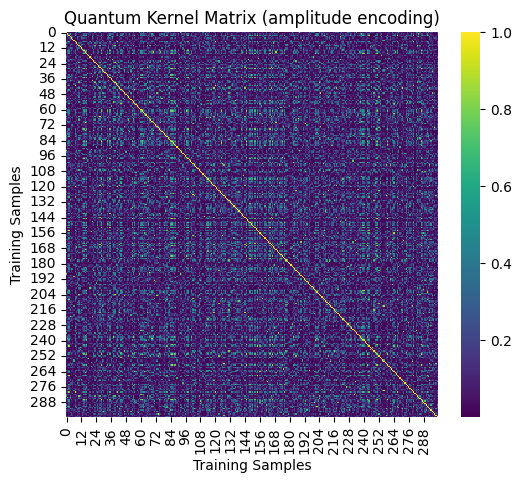

Using class weights: {np.int64(0): np.float64(1.9736842105263157), np.int64(1): np.float64(0.6696428571428571)}
Running GridSearchCV to find the best C parameter...
Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] END ..............................................C=0.1; total time=   0.0s
[CV] END ..............................................C=0.1; total time=   0.0s
[CV] END ..............................................C=0.1; total time=   0.0s
[CV] END ................................................C=1; total time=   0.0s
[CV] END ................................................C=1; total time=   0.0s
[CV] END ................................................C=1; total time=   0.0s
[CV] END ...............................................C=10; total time=   0.0s
[CV] END ...............................................C=10; total time=   0.0s
[CV] END ...............................................C=10; total time=   0.0s
[CV] END .....................................

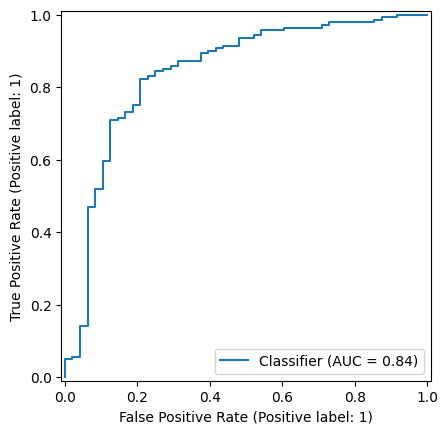

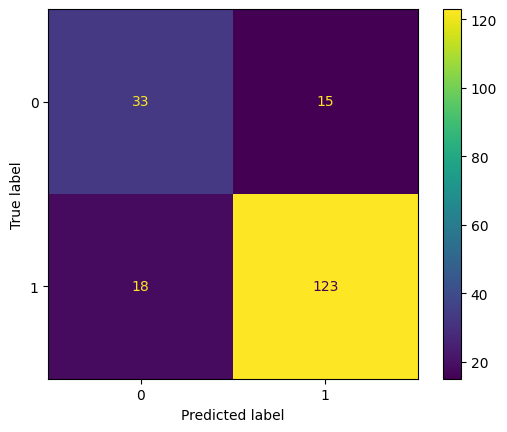


Quantum SVM Performance Metrics:
Accuracy:     0.825
ROC/AUC:      0.842
F1 Score:     0.882
Precision:    0.891
Recall:       0.872
Specificity:  0.688

Confusion Matrix:
[[ 33  15]
 [ 18 123]]

--- Pipeline for 4 Qubits (amplitude encoding) Finished ---

--- Starting Quantum SVM Pipeline for 8 Qubits (angle encoding) ---

1. Preprocessing and reducing feature dimensions with PCA...
Original feature count: 754
Target feature count (n_qubits): 8
Data transformed to 8 principal components.


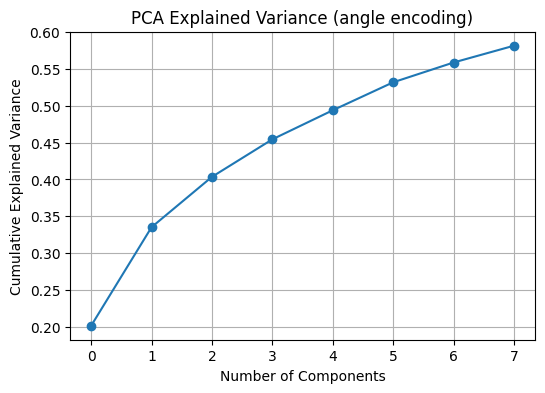


2. Training Quantum SVM...
Computing kernel matrix for training data with angle encoding...


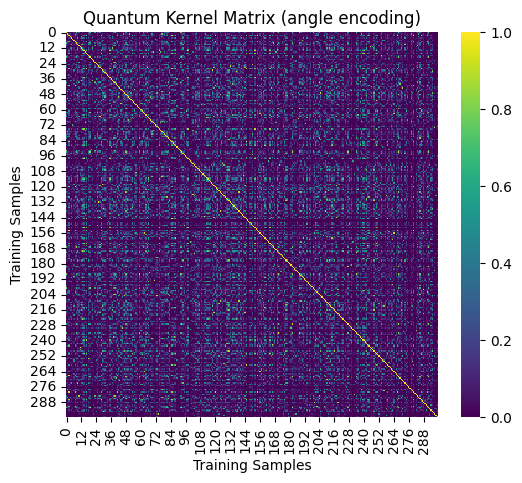

Using class weights: {np.int64(0): np.float64(1.9736842105263157), np.int64(1): np.float64(0.6696428571428571)}
Running GridSearchCV to find the best C parameter...
Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] END ..............................................C=0.1; total time=   0.0s
[CV] END ..............................................C=0.1; total time=   0.0s
[CV] END ..............................................C=0.1; total time=   0.0s
[CV] END ................................................C=1; total time=   0.0s
[CV] END ................................................C=1; total time=   0.0s
[CV] END ................................................C=1; total time=   0.0s
[CV] END ...............................................C=10; total time=   0.0s
[CV] END ...............................................C=10; total time=   0.0s
[CV] END ...............................................C=10; total time=   0.0s
[CV] END .....................................

In [ ]:
# =============================================================================
# STEP 6: Runing
# =============================================================================

# --- Split Data (stratify to maintain class distribution) ---
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.25, random_state=42, stratify=y
    )

print("\n--- Data Subsetting for Speed ---")
print(f"Original training set size: {len(X_train)} samples")
print(f"Original class distribution: Class 0: {np.sum(y_train == 0)}, Class 1: {np.sum(y_train == 1)}")

print(f"\nTaking a subset of {300} samples for faster execution...")
if len(X_train) > 300:
      # Use train_test_split to get a stratified random subset
      X_train_subset, _, y_train_subset, _ = train_test_split(
          X_train, y_train,
          train_size=300,
          random_state=42,
          stratify=y_train
        )

# --- Define encoding techniques to compare ---
encoding_techniques = [ "amplitude", "angle" ]
all_results = []

# --- Run the Pipeline for each encoding technique ---
for encoding in encoding_techniques:
    results = run_quantum_svm_pipeline(X_train_subset, y_train_subset, X_test, y_test, encoding=encoding)
    all_results.append(results)

# --- Compare Results ---
print("\n--- Comparison of Quantum SVM Performance with Different Encodings ---")
comparison_df = pd.DataFrame([res['metrics'] for res in all_results])
comparison_df['Encoding'] = [res['encoding'] for res in all_results]
comparison_df = comparison_df.set_index('Encoding')

print(comparison_df)